### List Excercises  
**Ex 1**

In [1]:
L = [1,2]
L3 = 3*L

1. What is the content of `L3`?

In [2]:
L3

[1, 2, 1, 2, 1, 2]

2. Try to predict outcome of the following commands:

In [8]:
print(L[0])
print(L[-1])

try:
    print(L[10])
except IndexError:
    print("IndexError Exception! Index value must be within the bound of the list length")

1
2
IndexError Exception! Index value must be within the bound of the list length


2. What does the this code do?

In [9]:
L4 = [k**2 for k in L3]
L4

[1, 4, 1, 4, 1, 4]

4. Concatenate `L3` and `L4` to a new list `L5`.

In [10]:
L5 = L3 + L4
L5

[1, 2, 1, 2, 1, 2, 1, 4, 1, 4, 1, 4]

**Ex 2**  
Use `range` command and a list comprehension to generate a list with 100 equidistantly spaced values between `0` and `1`.

In [23]:
L6 = [k/100 for k in range(100)]

print(L6[:5])
print(L6[-5:])

[0.0, 0.01, 0.02, 0.03, 0.04]
[0.95, 0.96, 0.97, 0.98, 0.99]


**Ex 3**  
Assume the following signal is stores in a list:

In [40]:
L = [0,1,2,1,0,-1,-2,-1,0]
L

[0, 1, 2, 1, 0, -1, -2, -1, 0]

What is the outcome of the following:  
(Do this by inspection first, then using Python to check)

In [39]:
print(L[0])
print(L[-1])
print(L[:-1])
L + L[1:-1] + L
L[2:2] = [-3]
L[3:4] = []
L[2:5] = [-5]
print(L)

0
0
[0, 1, 2, 1, 0, -1, -2, -1]
[0, 1, -5, -1, -2, -1, 0]


**Ex 4**  
Condiser the following Python code and assume the variable `m`has been previously assigned a integer value. What is the value of `ans`?. Do this by inspection first before executing it in Python.

In [42]:
m = 10

L = [n-m/2 for n in range(m)]
L

[-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]

**Ex 5**  
Considerthe recursion formula:  
  
$$u_{n+3}= u_{n+2}+ha\left({23 \over 12}u_{n+2}-{4 \over 3}u_{n+1}+{5 \over 12}u_{n}\right) $$  
  
with `n = 0, ... , 1000`, `h = 1/1000` and `a = -0.5`.  
  
**1.** Create a list `u`. Store in its first three elements `e^0`, `e^ha`, and `e^2ha`. These represent the starting values of `u0, u1` and `u2` in the given formula. Build up the complte list from the recursion formula.  

In [171]:
from math import e

print(h*a)
print(2*h*a)
print(e)
print(e**0)
print(e**(h*a))
print(e**(2*h*a))

-0.0005
-0.001
2.718281828459045
1.0
0.9995001249791693
0.999000499833375


In [160]:
# set initial values
n = list(range(1000))
h = 1/1000
a = -0.5

# Create list of initial 3 values. This list is to be built up recursively to len 1000
u = [e**0, e**(h*a), e**(2*h*a)]
print(n[:5],"...",n[-5:])
print(f"\nThe list before recursion with initial 3 elements: \n{u}")

[0, 1, 2, 3, 4] ... [995, 996, 997, 998, 999]

The list before recursion with initial 3 elements: 
[1.0, 0.9995001249791693, 0.999000499833375]


In [161]:
# Check the formula logic by creating potential element 4 of the list manually

i = 0

print(f"Given element 1 value: {u[n[0]]}")
print(f"Given element 2 value: {u[n[1]]}")
print(f"Given element 3 value: {u[n[2]]}")

data = u[n[i+2]] + h*a*( (23/12*u[n[i+2]]) -(4/3*u[n[i+1]]) +(5/12*u[n[i+0]]) )
#u.append(data)

print(f"New potential element 4 value: {data} \n")
print(f"We did not yet add the value to the result list: \n{u}")

Given element 1 value: 1.0
Given element 2 value: 0.9995001249791693
Given element 3 value: 0.999000499833375
New potential element 4 value: 0.9985011244376875 

We did not yet add the value to the result list: 
[1.0, 0.9995001249791693, 0.999000499833375]


The new value seems reasonable.  
Next, define a function and test it.

In [162]:
def recursion_formula(u,n,h,a,x):
    """
    Recursion formula for Ex. 5
    Inputs:
    n = list of range max 1000
    h = parameter default value 1/1000
    a = parameter default value -0.5
    
    u = list with 3 initial elements, to be recursively appended with a formula results until max range elements
    
    x = first element/index of a list to be recursively filled with formula results, default value 0
    """
    # Given recursion formula
    data = u[n[x+2]] + h*a*( (23/12*u[n[x+2]]) -(4/3*u[n[x+1]]) +(5/12*u[n[x+0]]) )
    
    return data

In [163]:
# Test function on one element 0
recursion_formula(u=u,n=n,h=h,a=a,x=0)

0.9985011244376875

The result is identical to above.    
Now we populate the full list of `u` with remaining `997` out of total `1000` elements

In [168]:
for i in n:
    # list of u already contains 3 elements out of total n=1000
    if i < len(n)-3:
        data = recursion_formula(u=u, n=n, h=h, a=a, x=i)
        u.append(data)
    else:
        break 

In [170]:
print(len(u))
print(u[:5])
print(u[-5:])

1000
[1.0, 0.9995001249791693, 0.999000499833375, 0.9985011244376875, 0.9980019986672862]
[0.6080488833365618, 0.6077449348883236, 0.6074411383763223, 0.6071374937246088, 0.6068340008572719]


In [169]:
print(len(n))
print(len(u))

1000
1000


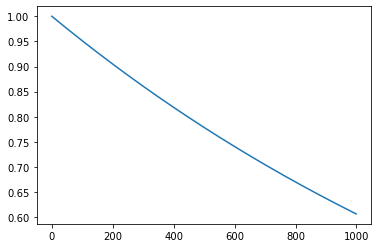

In [172]:
import matplotlib.pyplot as plt

plt.plot(u)

**2.** Construct a second list, `td`, in which you store the values `nh`, with `n = 0, ..., 1000`. Plot `td` versus `u`. Make a second plot in which you plot the difference, that is the `|e^atn - u_n|`, where `t_n`represents the values inside the vector `td`. Set axis labels and a title.  

In [183]:
import numpy as np

# create second list as array, using vectorization
td = np.array(n)*h

print(n[:5])
print(td[:5])

[0, 1, 2, 3, 4]
[0.    0.001 0.002 0.003 0.004]


Then we create the the plots.

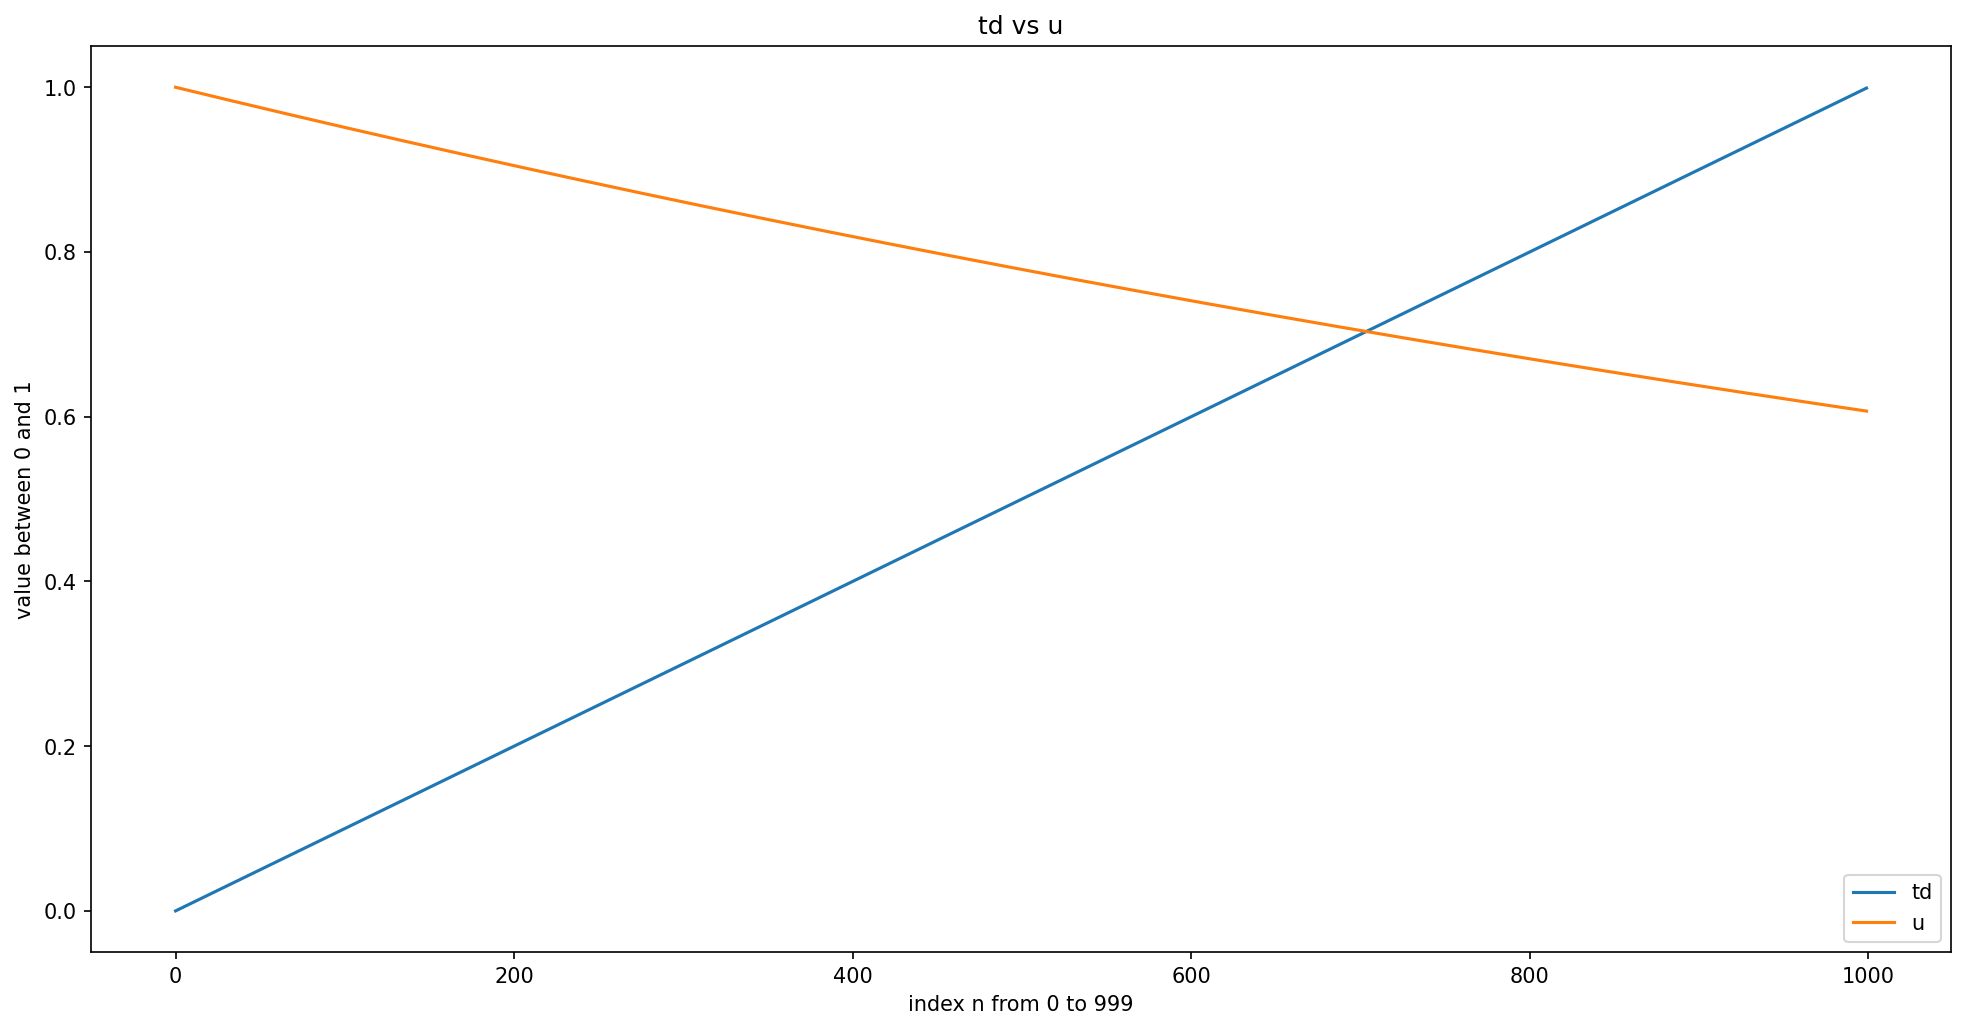

In [218]:
# plot 1

# set plot size
plt.figure(figsize=(16,8), dpi=150)

# add the two series to the plot
plt.plot(td)
plt.plot(u)
plt.title('td vs u')
plt.legend(['td','u'])
plt.xlabel('index n from 0 to 999')
plt.ylabel('value between 0 and 1')
plt.show()

In [216]:
# create list for second plot

# empty list for diffs
d = []

for i in n:
    # Calculate the given difference from above
    diff = e**(a*td[i]) - u[i]
    d.append(diff)

print(len(d))

1000

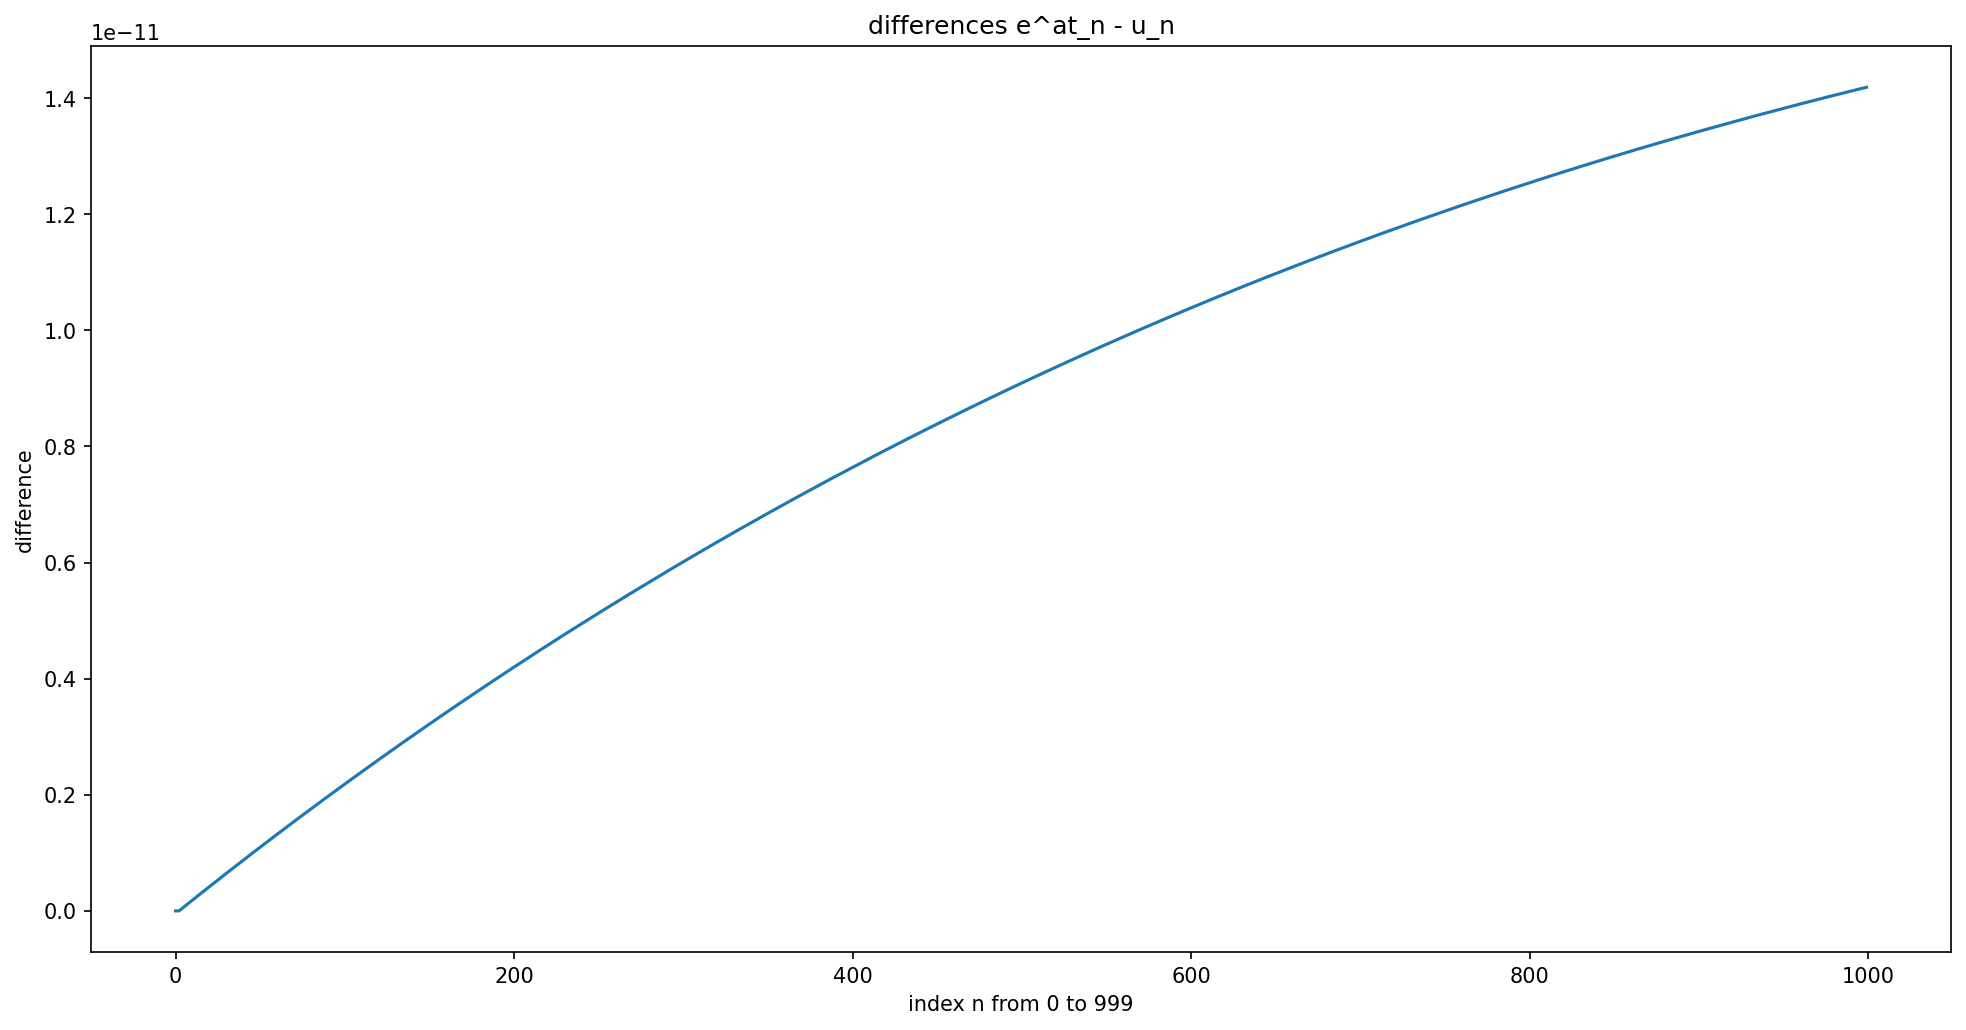

In [221]:
# Create plot 2

# set plot size
plt.figure(figsize=(16,8), dpi=150)

plt.plot(d)
plt.title('differences e^at_n - u_n')
plt.xlabel('index n from 0 to 999') 
plt.ylabel('difference')
plt.show()

The recursion is a multistep formula to solve the differential equation `u´ = au` with the initial value `u(0) = u_0 = 1`. `u_n` approximates `u(nh) = e^anh*u_0`.

**Ex 6**  
Let A and B be sets. The set (A / B) union (B / A) is called the sumetric difference of the two sets. Write a function that performs this operation. Compare the results to the result of the command:  
`A.symmetric_difference(B)`

In [197]:
A = set([1,2,3])
B = set([3,4,5])
print(type(A))
print(type(B))

<class 'set'>
<class 'set'>


In [198]:
A.symmetric_difference(B)

{1, 2, 4, 5}

**Ex 7**  
Verify in Python that the empty set is a subset of any set.

In [199]:
C = set([])
D = set([12,13,15])
E = set([4,5,6,7,8])
print(type(C))

<class 'set'>


In [208]:
# comparing empty set with non-empty set
C.issubset(D)

True